**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb).

# Introduction to Keras and TensorFlow

## The Python landscape for machine learning and deep learning

- [Python](https://www.python.org/) is an interpreted high-level general-purpose programming language.
- [NumPy](https://numpy.org/) is a Python library for manipulating multi-dimensional arrays and matrices. Allows Python to be used for numerical computing.
- [Matplotlib](https://matplotlib.org/) is a Python library for creating plots. Works nicely with NumPy. Its `pyplot` module provides a MATLAB like interface.
- [Scikit-learn](https://scikit-learn.org/) is a Python library built on top of NumPy and Matplotlib. This is the main library for machine learning especially for methods not based on neural networks.
- [TensorFlow](https://www.tensorflow.org/) is a Python library developed by Google for training deep learning models on CPUs, GPUs, and TPUs. TF2 was released in 2019.
- [Keras](https://keras.io/) is built on top of TensorFlow and provides consistent & simple APIs, minimizes the number of user actions required for common use cases, and provides clear & actionable error messages. The author of Keras, Francois Chollet, is also the author of the book *Deep Learning with Python* (2nd ed).




## What's TensorFlow?

Like NumPy, TF's main purpose is to enable engineers/researchers to manipulate numerical tensors. But TensorFlow goes far beyond the scope of NumPy:

- It can *automatically compute the gradient* of any differentiable expression, making it highly suitable for machine learning.
- It *can run not only on CPUs, but also on GPUs and TPUs*, highly parallel hardware accelerators.
- Computation defined in TensorFlow can be *easily distributed across many machines*.
- TensorFlow programs *can be exported to other runtimes*, such as C++, JavaScript (for browser-based applications), or TensorFlow Lite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.

More than just a library, TF is an ecosystem. For example, there is:

- TF-Agents for reinforcement learning research
- TensorFlow Hub for pretrained models
- TensorFlow Quantum for quantum machine learning

## What's Keras?

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/keras_and_tf.png" alt="picture" width="800">

## Keras and TensorFlow: A brief history

- Keras first released March 2015
- TF first released November 2015
- Keras originally built on top of Theano, a precursor of TF
- In late 2015, Keras refactored to allow multiple backend: Theano or TF
- In 2017, CNTK (Microsoft) and MXNet (Amazon) were added as backends
- 2016-2017: Keras becomes well-known as a user-friendly way to develop TF applications
- By late 2017, majority of TF users are using Kera
- In 2018, TF leadership decides to pick Keras as TF's official high-level API
- Keras API is front and center in TensorFlow 2.0, released in September 2019


Nowadays, both Theano and CNTK are out of development, and MXNet is not widely used outside of Amazon. Keras is back to being a single-backend API—on top of TensorFlow.

## Setting up a deep-learning workspace

- Recommended, although not strictly necessary, that you run deep learning code on a modern NVIDIA GPU
- Some applications will be excruciatingly slow on CPU
- Even for applications that can be run on CPU, you’ll generally see the speed-up of 5x-10x by using GPU

To do deep learning on a GPU, you have three options:
1. Buy and install a physical NVIDIA GPU on your workstation.
2. Use GPU instances on Google Cloud or AWS EC2.
3. Use the free GPU runtime from Colaboratory (Colab), a hosted notebook service offered by Google



### Jupyter notebooks: The preferred way to run deep-learning experiments

- They’re widely used in the data science and machine learning communities.
- It mixes the ability to execute Python (and many other supported languages including R and Julia) code with rich text-editing capabilities
- Allows you to break up long experiments into smaller pieces that can be executed independently
  - makes development interactive
  - you don’t have to rerun all previous code if something goes wrong later




#### Installing packages with pip
A command in a code cell that begins with an exclamation mark passes the command to the shell.


In [5]:
!pip list -v | grep "keras\|tensorflow"

keras                              2.13.1                                                        /Users/aileen/opt/anaconda3/lib/python3.8/site-packages pip
tensorflow                         2.13.1                                                        /Users/aileen/opt/anaconda3/lib/python3.8/site-packages pip
tensorflow-estimator               2.13.0                                                        /Users/aileen/opt/anaconda3/lib/python3.8/site-packages pip
tensorflow-io-gcs-filesystem       0.34.0                                                        /Users/aileen/opt/anaconda3/lib/python3.8/site-packages pip


In [6]:
#!pip install tensorflow

If a package you need isn't installed you can install it using
```
!pip install <package-name>
```


#### Using the GPU runtime

To use the GPU runtime with Colab, select `Runtime > Change Runtime Type` in the menu and select GPU for the Hardware Accelerator

In [7]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

## First steps with TensorFlow

Training a neural network revolves around the following concepts:

First, low-level tensor manipulations which translate to TensorFlow APIs:
- *Tensors*, including special tensors that store the network’s state (variables)
- *Tensor operations* such as addition, `relu`, `matmul`
- *Backpropagation*, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the `GradientTape` object)

Second, high-level deep learning concepts which translate to Keras APIs:
- *Layers*, which are combined into a *model*
- A *loss function*, which is used by the optimizer to assess how good a model is
- An *optimizer*, which determines how learning proceeds
- *Metrics* to evaluate model performance, such as accuracy
- A *training loop* that performs mini-batch stochastic gradient descent

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [8]:
x = tf.ones(shape=(2, 1)) # NumPy equivalent: np.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [9]:
x = tf.zeros(shape=(2, 1)) # NumPy equivalent: np.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [10]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.0194901 ]
 [-0.7758025 ]
 [-0.05716066]], shape=(3, 1), dtype=float32)


In [11]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.6148422 ]
 [0.03281999]
 [0.74907243]], shape=(3, 1), dtype=float32)


**NumPy compatibility**

Converting between a TensorFlow tf.Tensors and a NumPy ndarray is easy:

- TensorFlow operations automatically convert NumPy ndarrays to Tensors.
- NumPy operations automatically convert Tensors to NumPy ndarrays.
- Tensors are explicitly converted to NumPy ndarrays using their `.numpy()` method.

In [12]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


**NumPy arrays are assignable**

In [13]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


**TensorFlow tensors are not assignable**

In [14]:
try:
  x = tf.ones(shape=(2, 2))
  x[0, 0] = 0
except Exception as e:
  print(e)

'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


**Creating a TensorFlow variable**

In [15]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.157136 ],
       [ 1.1181382],
       [-0.7183695]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [16]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [17]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [18]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

**Using `assign_sub`**

In [19]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

Like NumPy, TensorFlow offers many math operations on tensors

**A few basic math operations**

In [20]:
a = tf.ones((2, 2))
print("a=\n", a)
b = tf.square(a)    # elementwise square
print("b=\n", b)
c = tf.sqrt(a)      # elementwise square root
print("c=\n", c)
d = b + c           # elementwise sum
print("d=\n", d)
e = tf.matmul(a, b) # matrix multiplication
print("e=\n", e)
e *= d              # elementwise multiplication
print("e=\n", e)

a=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
b=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
c=
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
d=
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e=
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e=
 tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### The GradientTape API

**Backpropagation**

Training a model via (minibatch stochastic) gradient descent involves computing gradients of the loss function w.r.t. model parameters. For example, consider the following two dense layer architecture (don't worry if you don't understand everything, we'll introduce Keras fundamentals soon!)

```
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```

Let `W1, b1, W2, b2` represent the weights and biases inside the two layers. Then the loss value could be expressed in code as

```
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```

Since all functions involved above--`loss`, `softmax`, matrix multiplication, and `relu`--are differentiable (the `relu` case is not entirely straightforward, we can discuss more if there's interest), we can use _chain rule_ to compute the derivate of `loss_value` w.r.t. model parameters.

**Backpropagation**: application of chain rule to the computation of the gradient values of a neural network

**Automatic differentiation with computation graphs**

Below is the computation graph of the simple two layer NN we saw above.

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/computation_graph_example.png" alt="picture" height="500">

- _Computation graph_ is a data structure at the heart of TensorFlow
- Computation graphs enable us to _treat computation as data_
- An _automatic differentiation_ program receives a computation graph as input and can automatically generate the derivative of the expression it represents

Let's consider a simplified version of the above figure:

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/computation_graph_simple.png" alt="picture" height="400">

```
x1 = w * x
x2 = x1 + b
loss_val = abs(y_true - x2)
```

- we have only one layer
- all variables are scalars
- we will use absolute value error: `loss_val = abs(y_true - x2)`
- we are interested in computing `grad(loss_val, b)` and `grad(loss _val, w)`

Suppose `x = 2`, `y_true = 4` and we want to evaluate the derivatives at `w = 3` and `b = 1`.


Let's first do it "by hand".

$f(w,b) = |y_{true} - (wx + b)| = |4 - (2w + b)|$

**Diff. w.r.t. w**

$f(w) = |4 - (2w + 1)| = g(h(H(w)))$ where $g(u) = |4-u|, h(u) = u+1, H(u) = 2u$

$ \frac{\partial f}{\partial w} = g'(h(H(w))) \times h'(H(w)) \times H'(w) = g'(7) \times h'(6) \times H'(3) = 1 \times 1 \times 2 = 2$

**Diff. w.r.t. b**

$f(b) = |4 - (6 + b)| = g(h(b))$ where $g(u) = |4-u|, h(u) = 6+u$

$ \frac{\partial f}{\partial b} = g'(h(b)) \times h'(b) = g'(7) \times h'(1) = 1 \times 1 = 1$

Forward pass:

```
x1 = w * x = 3 * 2 = 6
x2 = x1 + b = 6 + 1 = 7
loss_val = abs(y_true - x2) = abs(4-7) = 3
```

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/forward_pass.png" alt="picture" height="400">


Backward pass:

- `grad(loss_val, x2) = 1` because $\frac{\partial|4-x_2|}{\partial x_2} = 1$ at $x_2 = 7$
- `grad(x2,x1)=1` because $\frac{\partial (x_1+b)}{\partial x_1} = 1$ at $x_1 = 6$
- `grad(x2,b)=1` because $\frac{\partial (x_1+b)}{\partial b} = 1$ at $b = 1$
- `grad(x1,w)=2` because $\frac{\partial (w*2)}{\partial w} = 2$ at $w = 3$

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/backward_pass.png" alt="picture" height="400">

`grad(loss_val,w) = grad(loss_val, x2)*grad(x2,x1)*grad(x1,w) = 1 * 1 * 2 = 2`

`grad(loss_val,b) = grad(loss_val, x2)*grad(x2,b) = 1*1 = 1`

<img src="https://github.com/ambujtewari/stats315-winter2022/raw/main/images/path_to_w.png" alt="picture" height="400">

**Using the `GradientTape`**

In [21]:
w = tf.Variable(3.)
b = tf.Variable(1.)
x = tf.constant(2.)
y_true = tf.constant(4.)

with tf.GradientTape() as tape:
  x1 = w*x
  x2 = x1 + b
  loss_val = tf.abs(y_true - x2)

grad_w, grad_b, grad_x1, grad_x2 = tape.gradient(loss_val, [w, b, x1, x2]) # getting gradients w.r.t. both w and b
print("deriv of loss_val w.r.t. w = ", grad_w.numpy())
print("deriv of loss_val w.r.t. b = ", grad_b.numpy())
print("deriv of loss_val w.r.t. x1 = ", grad_x1.numpy())
print("deriv of loss_val w.r.t. x2 = ", grad_x2.numpy())

deriv of loss_val w.r.t. w =  2.0
deriv of loss_val w.r.t. b =  1.0
deriv of loss_val w.r.t. x1 =  1.0
deriv of loss_val w.r.t. x2 =  1.0


$r = x^2$

$\frac{dr}{dx} = 2x = 6$ at $x=3$

In [22]:
x = tf.Variable(3.)
with tf.GradientTape() as tape:
   r = tf.square(x)
gradient = tape.gradient(r, x)
print("deriv of r w.r.t. x = ", gradient.numpy())

deriv of r w.r.t. x =  6.0


**Using `GradientTape` with constant tensor inputs**

- only trainable _variables_ are tracked by default
- for a _constant_ tensor, we have to manually mark it as being tracked by calling `tape.watch()`
- this is to avoid wasting resources

In [23]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print("deriv of result w.r.t. input_const = ", gradient.numpy())

deriv of result w.r.t. input_const =  6.0


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [24]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [25]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [26]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets.shape

(2000, 1)

**Plotting the two point classes**

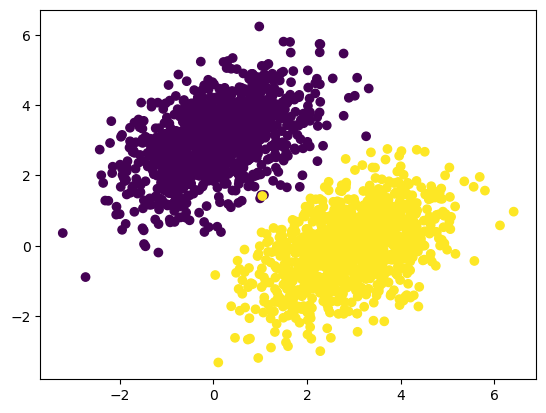

In [27]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [28]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [29]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The logistic loss function**

Note that book's example uses the squared loss function. For true label $y \in {0,1}$ and model output $o \in \mathbb{R}$, squared loss is defined as:

$$(y - o)^2 \ .$$

_Question: We studied squared loss in a regression problem. Why is it meaningful to use squared loss in a classification problem?_

We will instead use the logistic loss which is defined as

$$\log(1+\exp(o)) - y \cdot o \ .$$

This is nothing but the cross-entropy loss in the binary classification case where we use a linear model $o = \mathbf{w}^T \mathbf{x} + b$ and convert this output $o$ into a probability using the nonlinear standard logistic map:

$$
\hat{y} = \frac{\exp(o)}{1 + \exp(o)} = \frac{1}{1+\exp(-o)}
$$

We can then interpret our overall model as modelling the probability of $y = 1$ given $\mathbf{x}$ as

$$
P(y = 1| \mathbf{x}) = \frac{\exp(\mathbf{w}^T \mathbf{x}+b)}{1 + \exp(\mathbf{w}^T \mathbf{x}+b)}
$$

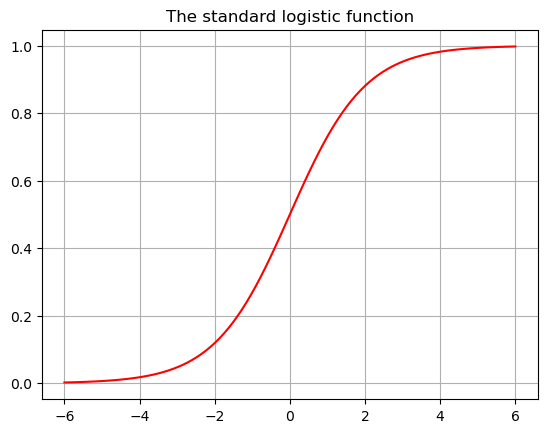

In [30]:
o = np.linspace(-6, 6, 100)
y_hat = 1./(1 + np.exp(-o))
plt.plot(o, y_hat, "-r")
plt.grid()
plt.title("The standard logistic function")
plt.show()

In [31]:
def logistic_loss(targets, predictions):
    per_sample_losses = tf.math.log(1.0 + tf.math.exp(predictions)) - targets * predictions
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [32]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = logistic_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [33]:
for step in range(100): # increase this to get better results
    loss = training_step(inputs, targets)
    if (step+1) % 10 == 0:
        print(f"Loss at step {step}: {loss:.4f}")

Loss at step 9: 0.2331
Loss at step 19: 0.1403
Loss at step 29: 0.1064
Loss at step 39: 0.0876
Loss at step 49: 0.0754
Loss at step 59: 0.0667
Loss at step 69: 0.0601
Loss at step 79: 0.0549
Loss at step 89: 0.0508
Loss at step 99: 0.0473


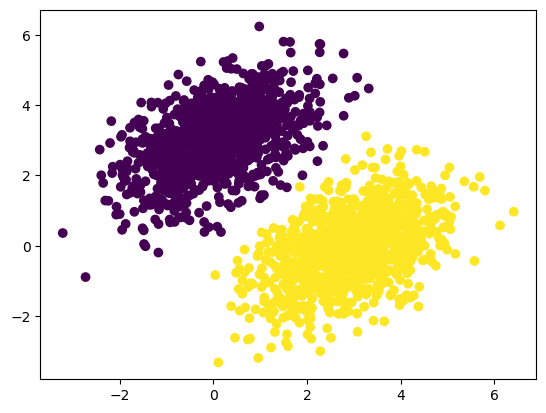

In [34]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0)
plt.show()

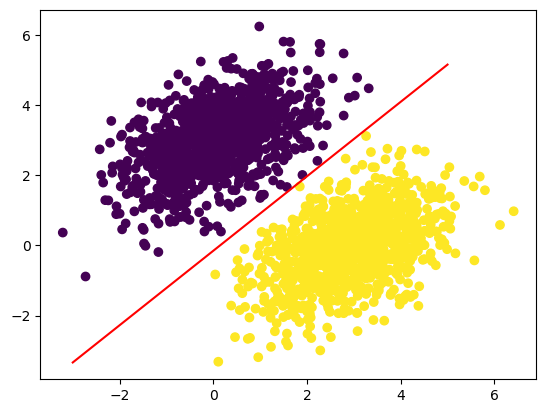

In [35]:
x = np.linspace(-3, 5, 100)
y = - W[0] /  W[1] * x - b / W[1]
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0)
plt.plot(x, y, "-r")